<a href="https://colab.research.google.com/github/spannozzo/udemi-deep-learning/blob/main/udemi_course_ex1_2_ANN_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
!git clone https://github.com/spannozzo/udemi-deep-learning

fatal: destination path 'udemi-deep-learning' already exists and is not an empty directory.


In [9]:
import pandas as pd

df = pd.read_csv('/content/udemi-deep-learning/Churn_Modelling_normalized.csv')

In [10]:
df.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Age_bin',
       'Balance_to_Salary', 'Geography_France', 'Geography_Germany',
       'Geography_Spain', 'Gender_Female', 'Gender_Male', 'BalanceRange',
       'SalaryRange'],
      dtype='object')

In [11]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bin,Balance_to_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceRange,SalaryRange
0,619,42,2,0.00,1,1,1,101348.88,1,3,0.000000,1,0,0,1,0,Zero Balance,Above Average Salary
1,608,41,1,83807.86,1,0,1,112542.58,0,3,0.744677,0,0,1,1,0,Medium Balance,Above Average Salary
2,502,42,8,159660.80,3,1,0,113931.57,1,3,1.401375,1,0,0,1,0,Very High Balance,Above Average Salary
3,699,39,1,0.00,2,0,0,93826.63,0,2,0.000000,1,0,0,1,0,Zero Balance,Below Average Salary
4,850,43,2,125510.82,1,1,1,79084.10,0,3,1.587055,0,0,1,1,0,High Balance,Below Average Salary


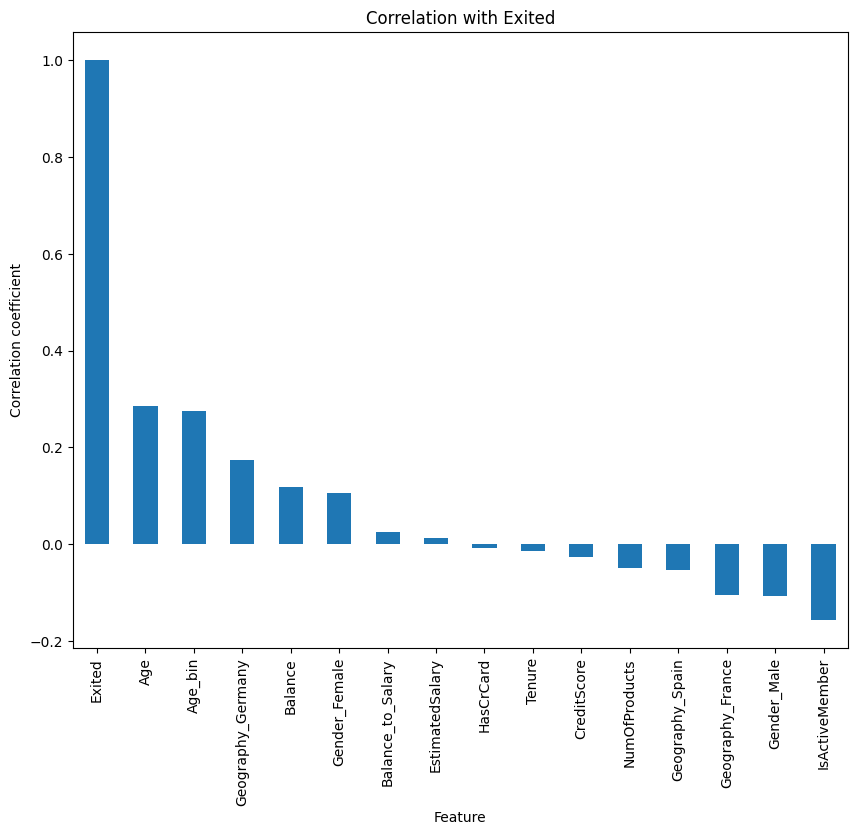

In [12]:
import matplotlib.pyplot as plt

corr_matrix = df.corr(numeric_only=True)
exited_corr = corr_matrix['Exited']


plt.figure(figsize=(10,8))
exited_corr.sort_values(ascending=False).plot(kind='bar')
plt.title('Correlation with Exited')
plt.xlabel('Feature')
plt.ylabel('Correlation coefficient')
plt.show()


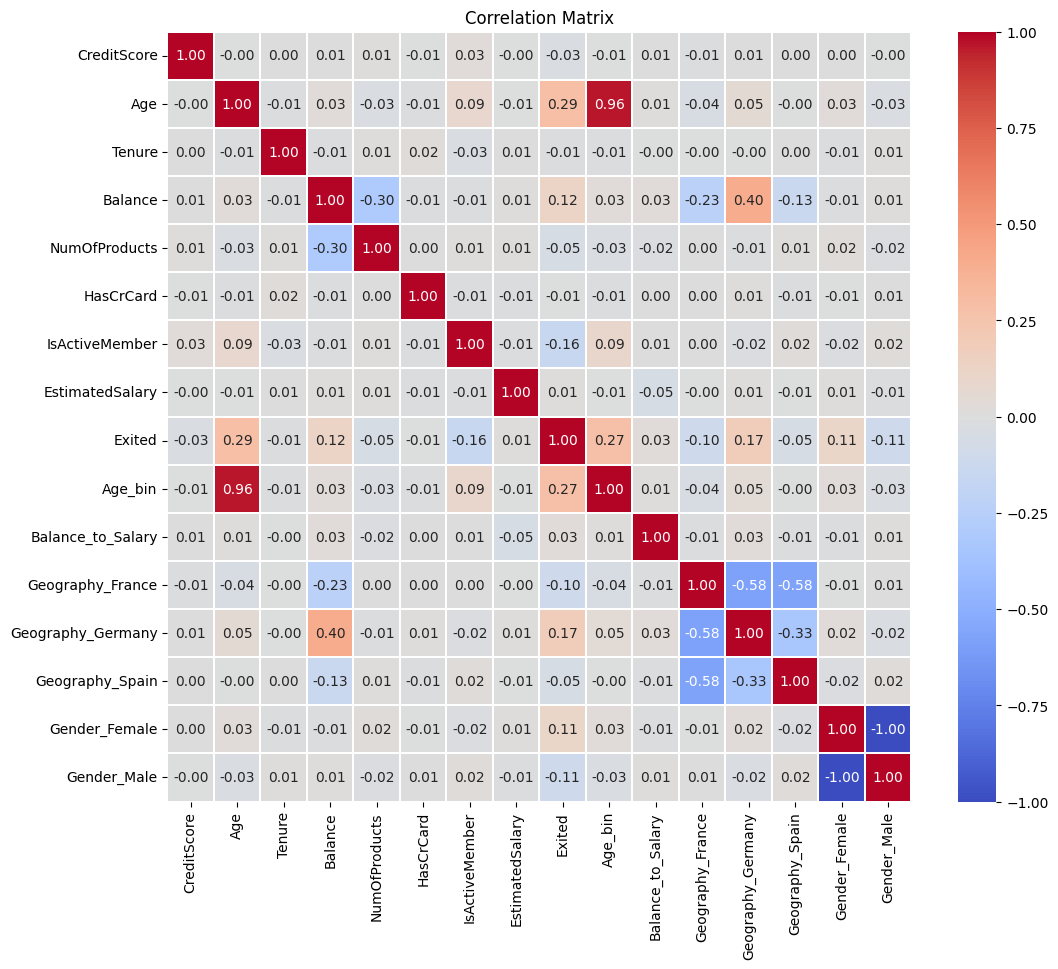

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Assuming corr_matrix is your correlation matrix
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.1)
plt.title('Correlation Matrix')
plt.show()


<ipython-input-14-a28483681ed1>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])


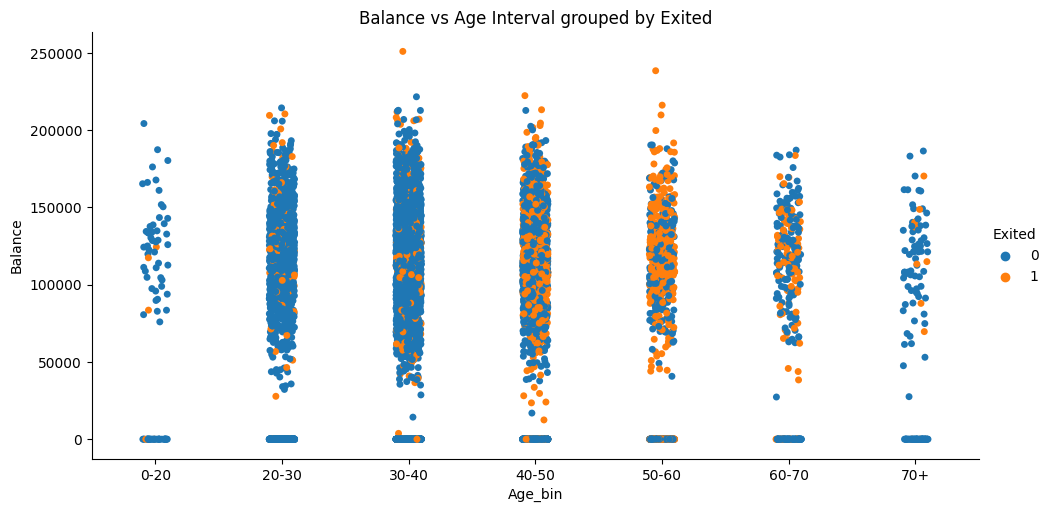

In [14]:


sns.catplot(data=df, x='Age_bin', y='Balance', hue='Exited', kind='strip', aspect=2)
plt.title('Balance vs Age Interval grouped by Exited')

# Set custom x-axis tick labels
plt.gca().set_xticklabels(['0-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70+'])

plt.show()


<ipython-input-15-3a3fe6dbd7f6>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['0', '0-20','20-30', '30-40', '40-50', '50-60', '60-70', '70+'])


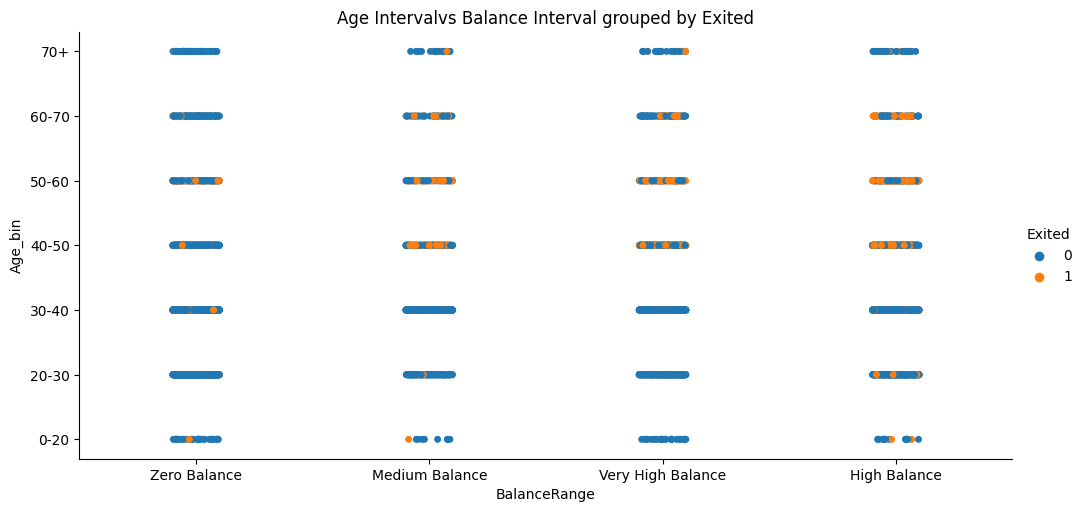

In [15]:
sns.catplot(data=df, x='BalanceRange', y='Age_bin', hue='Exited', kind='strip', aspect=2)
plt.title('Age Intervalvs Balance Interval grouped by Exited')


plt.gca().set_yticklabels(['0', '0-20','20-30', '30-40', '40-50', '50-60', '60-70', '70+'])


plt.show()

<ipython-input-16-4d7f40d5632b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(['0', '0-20','20-30', '30-40', '40-50', '50-60', '60-70', '70+'])


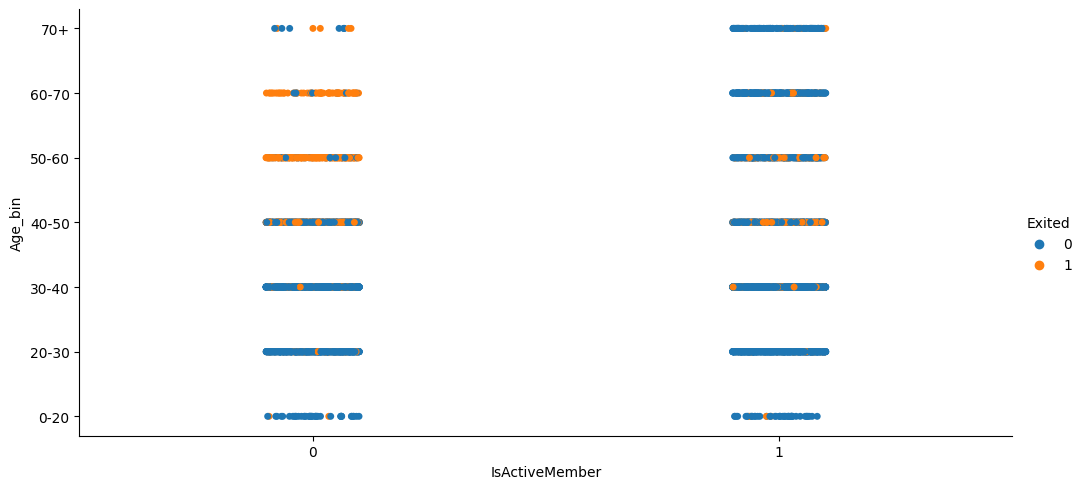

In [16]:
sns.catplot(data=df, y='Age_bin', x='IsActiveMember', hue='Exited', kind='strip', aspect=2)
# plt.title('Age Intervalvs Balance Interval grouped by Exited')


plt.gca().set_yticklabels(['0', '0-20','20-30', '30-40', '40-50', '50-60', '60-70', '70+'])


plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# Create a boolean mask for categorical columns
categorical_mask = (df.dtypes == object)

# Create a LabelEncoder for categorical columns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df_label = df.copy()

# Apply LabelEncoder to categorical columns
df_label[df.columns[categorical_mask]] = df[df.columns[categorical_mask]].apply(lambda x: le.fit_transform(x))

df_label.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bin,Balance_to_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceRange,SalaryRange
0,619,42,2,0.00,1,1,1,101348.88,1,3,0.000000,1,0,0,1,0,3,0
1,608,41,1,83807.86,1,0,1,112542.58,0,3,0.744677,0,0,1,1,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,1.401375,1,0,0,1,0,2,0
3,699,39,1,0.00,2,0,0,93826.63,0,2,0.000000,1,0,0,1,0,3,1
4,850,43,2,125510.82,1,1,1,79084.10,0,3,1.587055,0,0,1,1,0,0,1


In [18]:
# Let's split the data into train and test sets
X = df_label.drop('Exited', axis=1)
y = df_label['Exited']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Age_bin,Balance_to_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceRange,SalaryRange
9254,686,32,6,0.00,2,1,1,179093.26,2,0.000000,1,0,0,0,1,3,2
1561,632,42,4,119624.60,2,1,1,195978.86,3,0.610395,0,1,0,0,1,0,2
1670,559,24,3,114739.92,1,1,0,85891.02,1,1.335878,0,0,1,0,1,0,1
6087,561,27,9,135637.00,1,1,0,153080.40,1,0.886051,1,0,0,1,0,2,2
6669,517,56,9,142147.32,1,0,0,39488.04,4,3.599756,1,0,0,0,1,2,3


In [19]:
from sklearn.preprocessing import StandardScaler

# Assuming X_train and X_test are your data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled[0,:]

array([ 0.35649971, -0.6557859 ,  0.34567966, -1.21847056,  0.80843615,
        0.64920267,  0.97481699,  1.36766974, -0.3094747 , -0.13312293,
        1.00150113, -0.57946723, -0.57638802, -0.91324755,  0.91324755,
        1.06431825,  0.44898288])

In [20]:
# Create a RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rfc.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rfc.predict(X_test_scaled)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

accuracy

0.867

In [21]:
importances = rfc.feature_importances_

# Create a DataFrame for visualization
importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
importances_df = importances_df.sort_values(by='Importance', ascending=False)

importances_df

,Feature,Importance
1,Age,0.163577
4,NumOfProducts,0.124204
0,CreditScore,0.112559
7,EstimatedSalary,0.109608
3,Balance,0.092229
9,Balance_to_Salary,0.081393
8,Age_bin,0.070005
2,Tenure,0.068558
6,IsActiveMember,0.043041
16,SalaryRange,0.027602


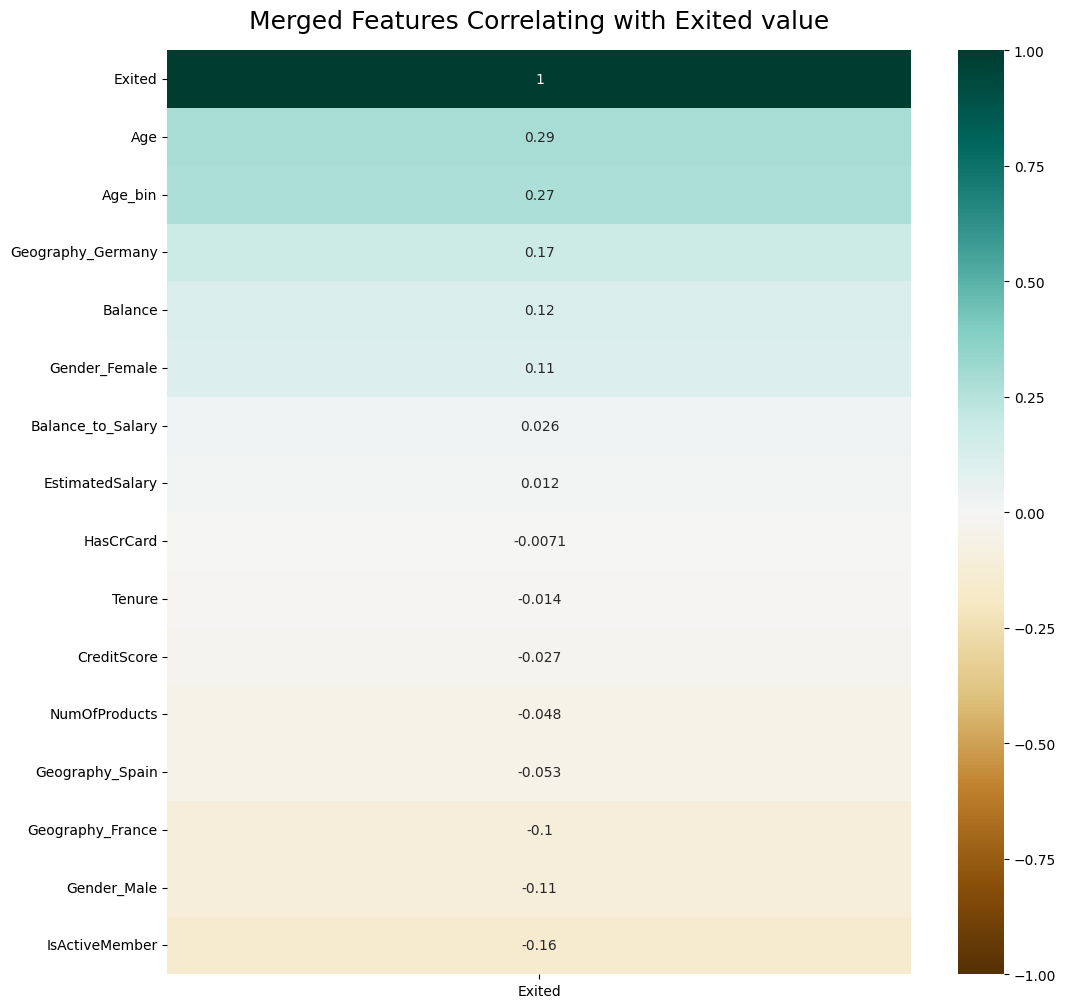

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt
 
corr_Exited = df.corr(numeric_only=True)[['Exited']].sort_values(by='Exited', ascending=False)

plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_Exited, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Merged Features Correlating with Exited value', fontdict={'fontsize':18}, pad=16);

relevant_columns_positive = corr_Exited.iloc[:,:][corr_Exited.iloc[:,:] >= 0.1]
relevant_columns_negative = corr_Exited.iloc[:,:][corr_Exited.iloc[:,:] <= - 0.1]

In [23]:
tmp_corr= df_label.corr(numeric_only=True)

In [24]:
relevant_data= df_label.iloc[:,df_label.columns.isin( tmp_corr.index.to_list() )]
relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  int64  
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Age_bin            10000 non-null  int64  
 10  Balance_to_Salary  10000 non-null  float64
 11  Geography_France   10000 non-null  int64  
 12  Geography_Germany  10000 non-null  int64  
 13  Geography_Spain    10000 non-null  int64  
 14  Gender_Female      10000 non-null  int64  
 15  Gender_Male        10000 non-null  int64  
 16  BalanceRange       1000

In [25]:
exited = df_label[df_label['Exited']==1]
exited.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_bin,Balance_to_Salary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,BalanceRange,SalaryRange
0,619,42,2,0.00,1,1,1,101348.88,1,3,0.000000,1,0,0,1,0,3,0
2,502,42,8,159660.80,3,1,0,113931.57,1,3,1.401375,1,0,0,1,0,2,0
5,645,44,8,113755.78,2,1,0,149756.71,1,3,0.759604,0,0,1,0,1,0,2
7,376,29,4,115046.74,4,1,0,119346.88,1,1,0.963969,0,1,0,1,0,0,0
16,653,58,1,132602.88,1,1,0,5097.67,1,4,26.012449,0,1,0,0,1,2,3


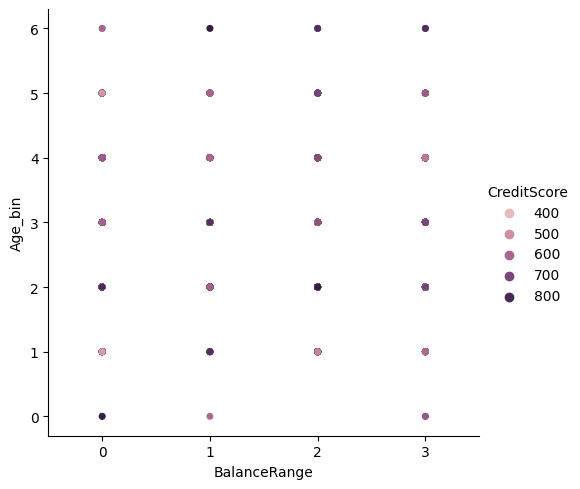

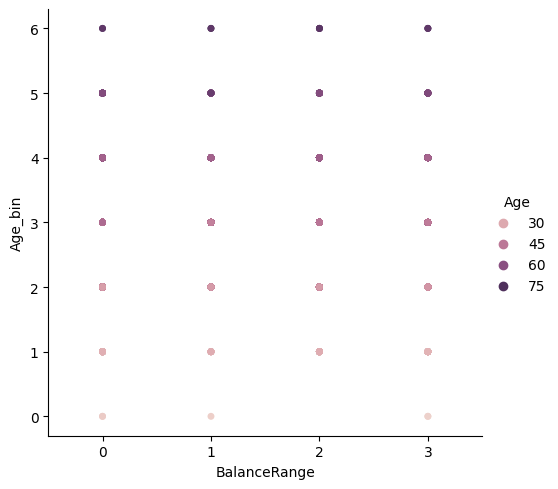

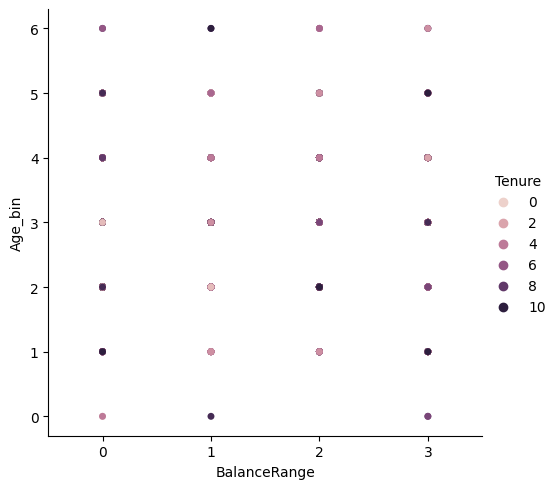

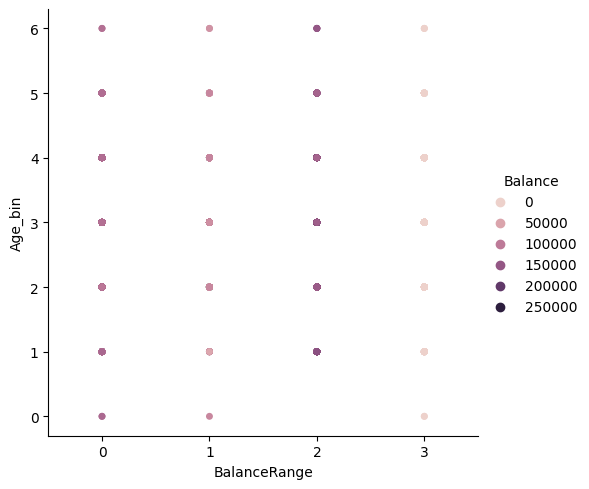

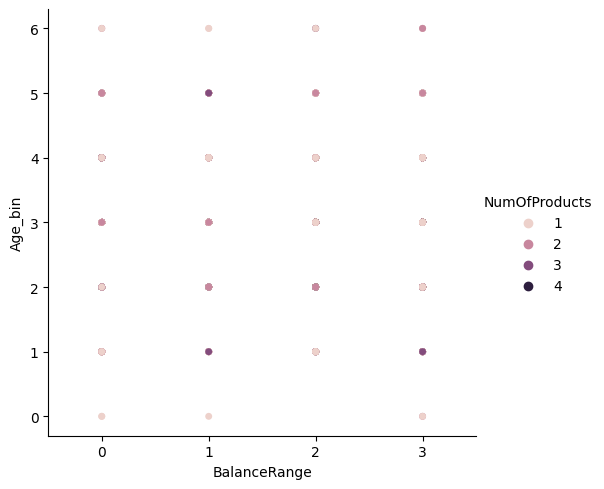

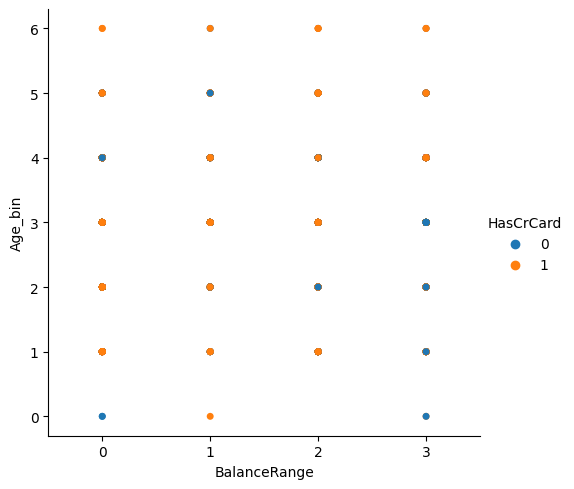

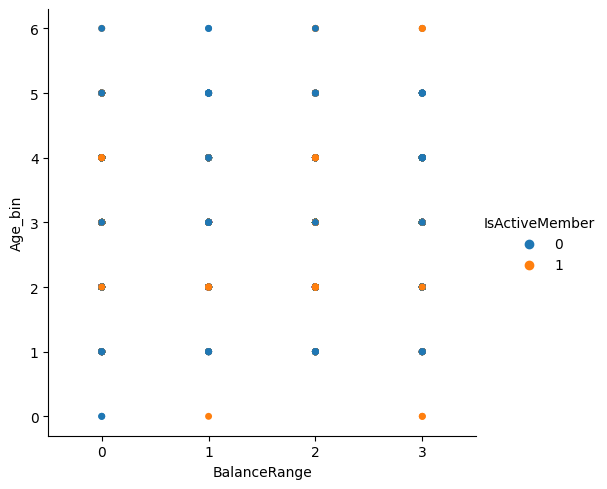

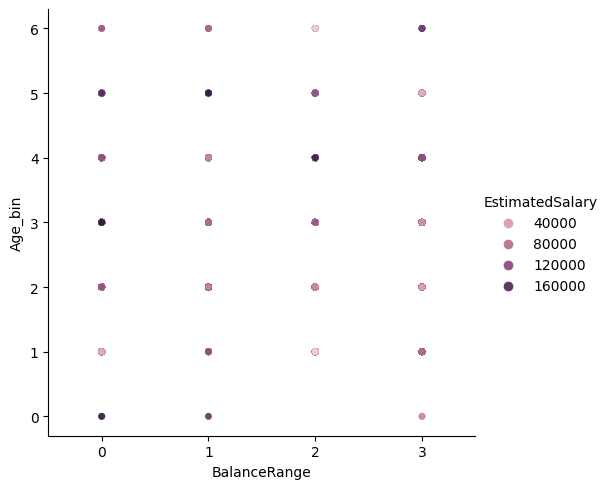

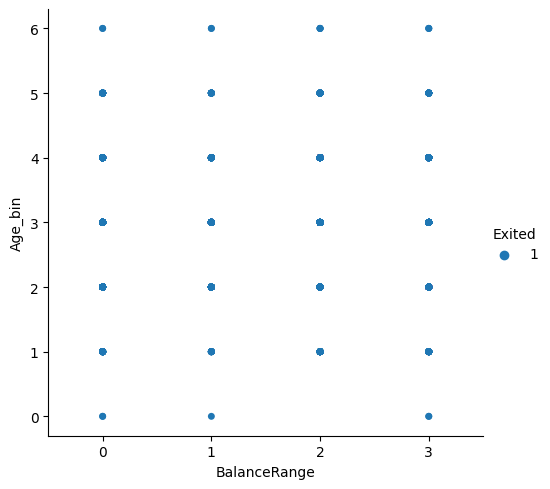

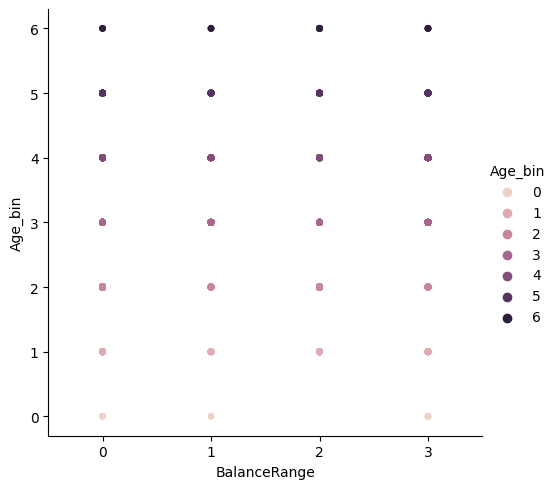

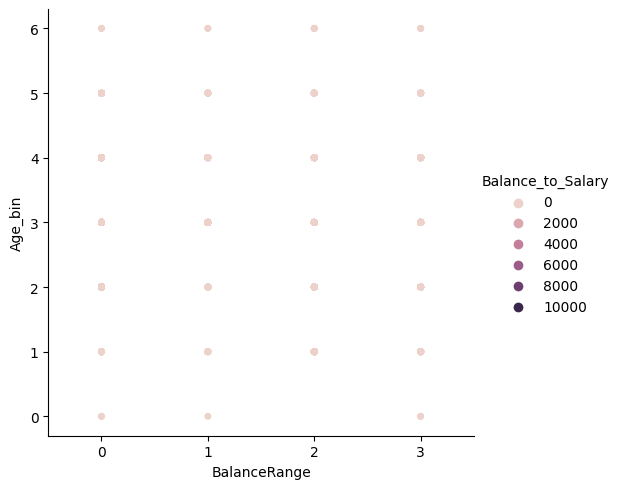

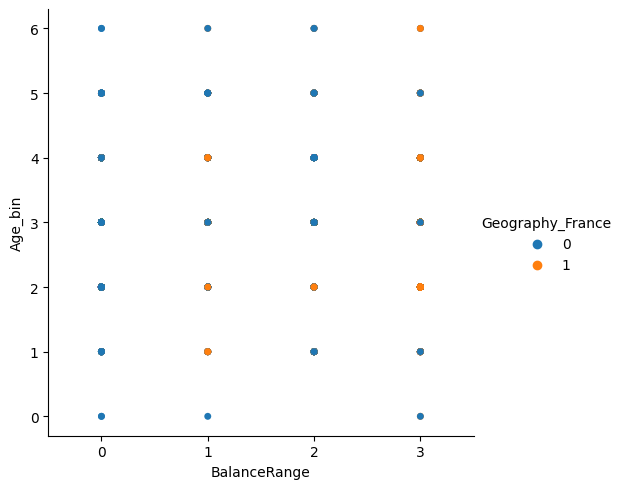

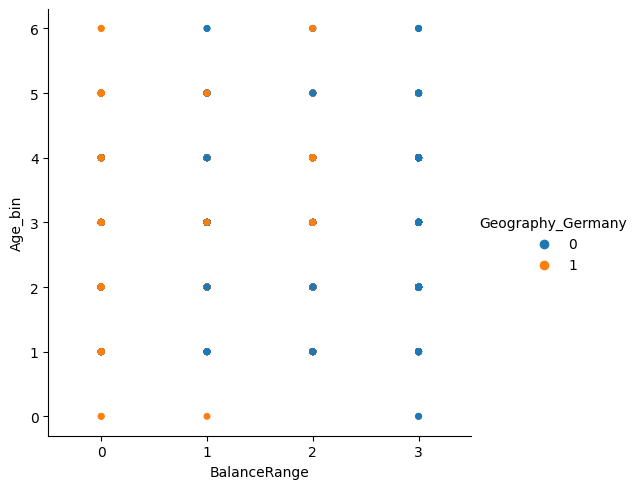

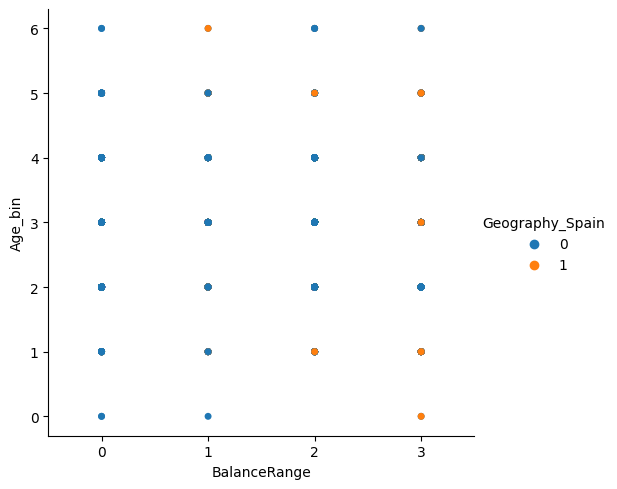

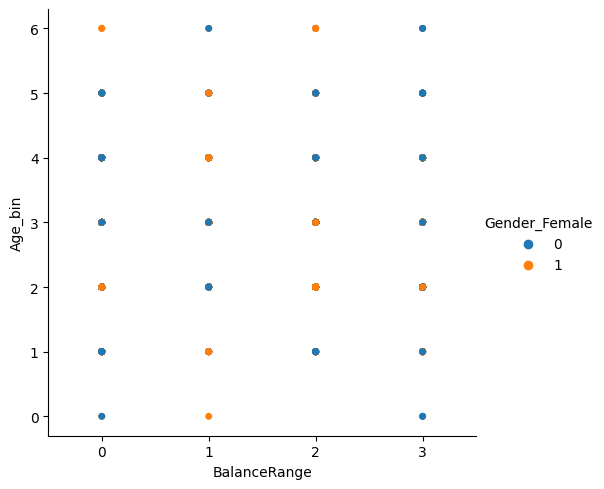

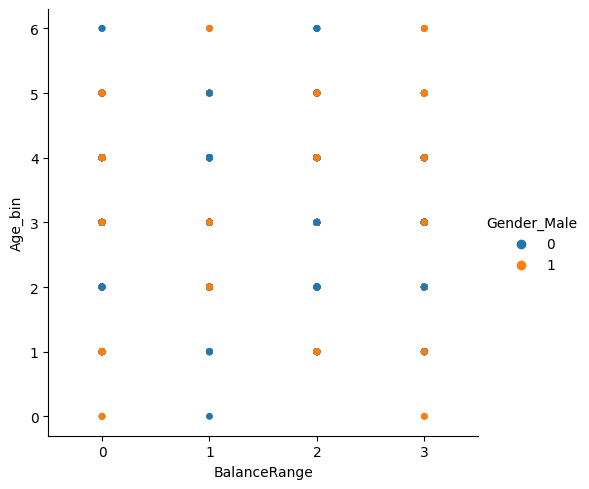

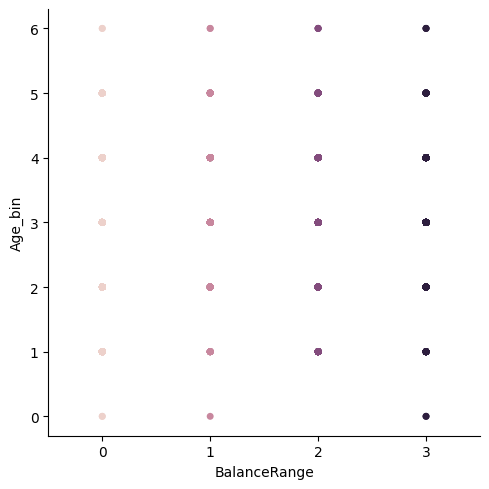

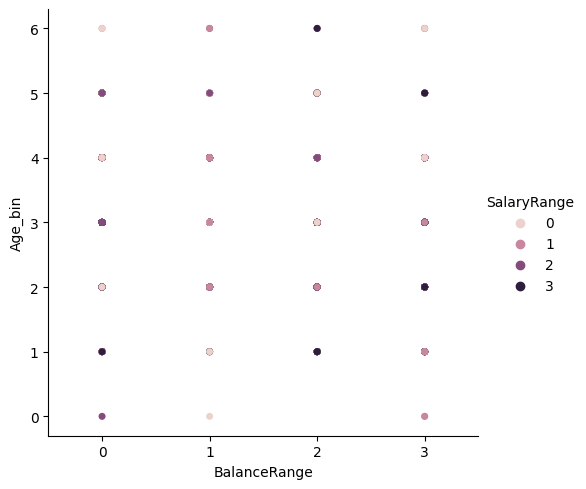

<Figure size 640x480 with 0 Axes>

In [26]:
for c in relevant_data.columns:
  sns.catplot(x="BalanceRange", y="Age_bin", jitter = False, hue= c , data=exited )
plt.show()
plt.tight_layout()

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [28]:
model = Sequential()
input_layer = Dense(units=6,activation='relu')
model.add(input_layer)

In [29]:
hidden_layer = Dense(units=6, activation='relu') 
model.add(hidden_layer)

In [30]:
output_layer = Dense(units=1,activation='sigmoid')
model.add(output_layer)

In [31]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [32]:
h = model.fit(X_train_scaled,y_train,validation_split=0.1,batch_size=32, epochs=200)

Epoch 1/200
225/225 [==============================] - 2s 2ms/step - loss: 0.7011 - accuracy: 0.5510 - val_loss: 0.5370 - val_accuracy: 0.8150
Epoch 2/200
225/225 [==============================] - 0s 2ms/step - loss: 0.5046 - accuracy: 0.7929 - val_loss: 0.4569 - val_accuracy: 0.8062
Epoch 3/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4600 - accuracy: 0.7981 - val_loss: 0.4254 - val_accuracy: 0.8238
Epoch 4/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4425 - accuracy: 0.8042 - val_loss: 0.4113 - val_accuracy: 0.8313
Epoch 5/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4339 - accuracy: 0.8103 - val_loss: 0.4027 - val_accuracy: 0.8338
Epoch 6/200
225/225 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8165 - val_loss: 0.3963 - val_accuracy: 0.8375
Epoch 7/200
225/225 [==============================] - 0s 2ms/step - loss: 0.4167 - accuracy: 0.8221 - val_loss: 0.3902 - val_accuracy: 0.8400

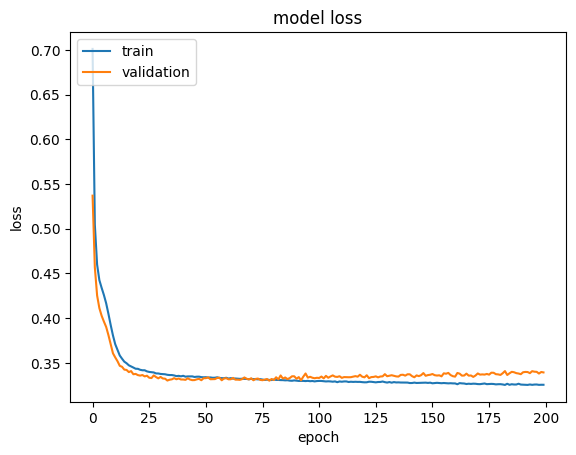

In [33]:
plt.plot(h.history['loss'])
plt.plot(h.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

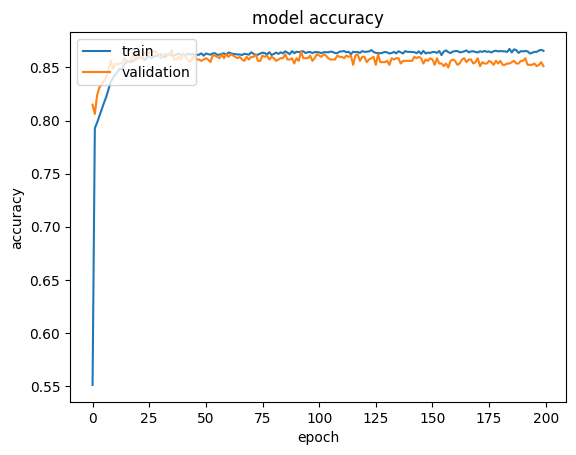

In [34]:
plt.plot(h.history['accuracy'])
plt.plot(h.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
import numpy as np

y_pred = model.predict(X_test_scaled)
y_pred = np.where(y_pred > 0.5, 1, 0)
y_pred

63/63 [==============================] - 0s 1ms/step


array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [36]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8585

In [37]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

cm


array([[1537,   70],
       [ 213,  180]])